# Filtragem no domínio da frequência

As operações de filtragem podem ser realizadas tanto no domínio do espaço quanto de frequência, Os filtros em frequência são normalmente classiﬁcados em três categorias:

- passa-baixas,
- passa-altas e
- passa-faixa.

O efeito visual de um filtro passa-baixas é o de suavização da imagem, uma vez que as altas frequências, que correspondem às transições abruptas, são atenuadas. A suavização tende também, pelas mesmas razões, a minimizar o efeito do ruído em imagens. Um filtro passa-altas realça as altas frequências e são normalmente usados para realçar os detalhes na imagem. O efeito obtido é, em geral, o realce de bordas. Um filtro passa-faixa seleciona um intervalo de frequências do sinal para ser realçado.
Filtragem em frequência usando o Teorema da convolução

O Teorema da Convolução garante que a convolução no domínio espacial equivale a um produto no domínio da frequência. Ou seja, ao invés de aplicarmos um filtro no domínio espacial através da convolução da imagem $f(x,y)$ com uma máscara $h(x,y)$ podemos aplicar um filtro no domínio da frequência através do produto da Transformada de Fourier da imagem $F(u,v)$ com a Transformada de Fourier da máscara (filtro) $H(u,v)$.

## 1. Filtros passa-baixas

As bordas e outras transições abruptas (tal como ruído) nos níveis de cinza de uma imagem contribuem significamente para o conteúdo de alta frequência de uma imagem. Assim, a suavização é alcançada no domínio da frequência através da atenuação de um intervalo específico de componentes de alta frequência na transformada de uma imagem.

### 1.1 Filtro passa-baixas ideal

Um filtro passa-baixas ideal bidimensional é aquele cuja função de transferência satisfaz a relação 
$$ H(u,v) = \begin{cases}
1, & \text{se $D(u,v)\leq{D_0}$}\\ 
0, & \text{se $D(u,v)>{D_0}$}
\end{cases}$$ 

em que $D_0$ é um valor não-negativo específico e $D(u, v)$ é a distância do ponto $(u,v)$ à origem do plano da frequência. Normalmente $D_0$ é denominado frequência de corte.

### Exemplo

A Figura abaixo ilustra cada uma das etapas envolvidas no processo de aplicação de um filtro passa-baixas ideal sobre uma imagem.

In [122]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import scipy.signal as sci
from numpy.fft import fft2, ifft2
import sys,os
ia898path = os.path.abspath('../../')
if ia898path not in sys.path:
    sys.path.append(ia898path)
import ia898.src as ia

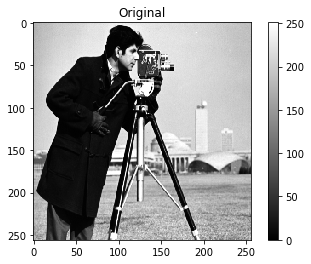

In [123]:
f = mpimg.imread('../data/cameraman.tif')
plt.imshow(f,cmap='gray');
plt.title('Original')
plt.colorbar()
plt.show()

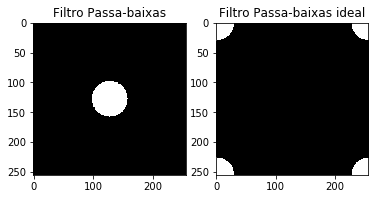

In [175]:
# Criando o filtro ideal (circulo) em frequência
H = ia.circle(f.shape, 30, np.divide(f.shape, 2))
x,y = f.shape
HPB_ideal = ia.ptrans(H,(x//2,y//2))

plt.figure(1)
plt.subplot(1,2,1)
plt.imshow(H,cmap='gray');
plt.title('Filtro Passa-baixas')

plt.subplot(1,2,2)
plt.imshow(HPB_ideal,cmap='gray');
plt.title('Filtro Passa-baixas ideal')


In [125]:
# Filtrando a imagem no domínio da frequência
F = fft2(f)
G = F * HPB_ideal
gg = ifft2(G)

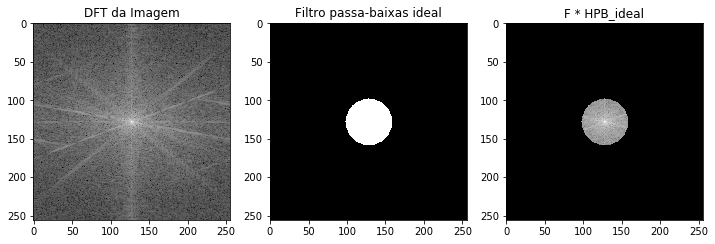

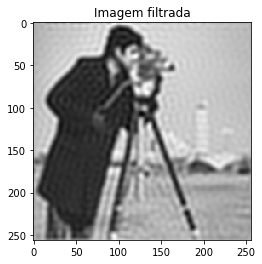

In [176]:

plt.figure(1, figsize=(12,12))
plt.subplot(1,3,1)
plt.imshow(np.log(np.abs(ia.ptrans(F,(x//2,y//2))+1)),cmap='gray')
plt.title('DFT da Imagem')

plt.subplot(1,3,2)
plt.imshow(np.log(np.abs(ia.ptrans(HPB_ideal,(x//2,y//2))+1)),cmap='gray')
plt.title('Filtro passa-baixas ideal')

plt.subplot(1,3,3)
plt.imshow(np.log(np.abs(ia.ptrans(G,(x//2,y//2))+1)),cmap='gray')
plt.title('F * HPB_ideal')

plt.figure(2)
#plt.subplot(1,4,4)
plt.imshow(gg.real.astype(np.float),cmap='gray');
plt.title('Imagem filtrada')


Para entender os efeitos observados na filtragem com o filtro ideal, vamos visualizar o filtro ideal no espaço.

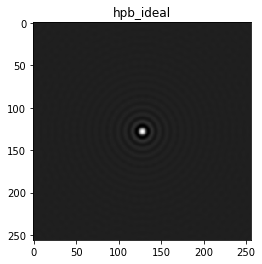

In [177]:
hpb_ideal = ifft2(HPB_ideal)
                        
plt.imshow(np.log(np.abs(ia.ptrans(hpb_ideal,(x//2,y//2))+1)),cmap='gray');
plt.title('hpb_ideal')

## 2. Filtros passa-altas

Quando o que buscamos em uma imagem são justamente as bordas, ou seja, o conteúdo de alta frequência de uma imagem, usamos um filtro passa-altas, atenuando um intervalo específico de componentes de baixa frequência.

2.1 Filtro passa-altas ideal

Um filtro passa-altas ideal bidimensional é aquele cuja função de transferência satisfaz a relação
$$ H(u,v) = \begin{cases}
0, & \text{se $D(u,v)\leq{D_0}$}\\ 
1, & \text{se $D(u,v)>{D_0}$}
\end{cases}$$

em que $D_0$ é um valor não-negativo específico e $D(u, v)$ é a distância do ponto $(u,v)$ à origem do plano da frequência. Aqui também $D_0$ é denominado frequência de corte.


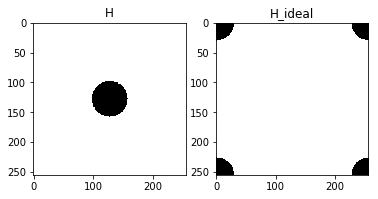

In [179]:
# Criando o filtro ideal (circulo) em frequência
HPA = 1 - ia.circle(f.shape, 30, np.divide(f.shape, 2))
x,y = f.shape
HPA_ideal = ia.ptrans(HPA,(x//2,y//2))

plt.figure(1)
plt.subplot(1,2,1)
plt.imshow(HPA,cmap='gray');
plt.title('H')

plt.subplot(1,2,2)
plt.imshow(HPA_ideal,cmap='gray');
plt.title('H_ideal')

In [180]:
# Filtrando a imagem no domínio da frequência
F = fft2(f)
G2 = F * HPA_ideal
gg2 = ifft2(G2)

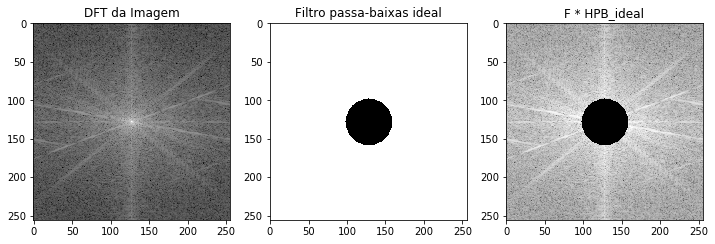

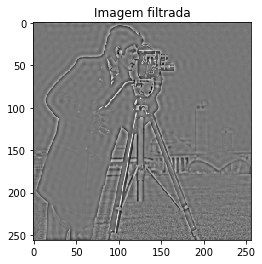

In [181]:
plt.figure(1, figsize=(12,12))
plt.subplot(1,3,1)
plt.imshow(np.log(np.abs(ia.ptrans(F,(x//2,y//2))+1)),cmap='gray')
plt.title('DFT da Imagem')

plt.subplot(1,3,2)
plt.imshow(np.log(np.abs(ia.ptrans(HPA_ideal,(x//2,y//2))+1)),cmap='gray')
plt.title('Filtro passa-baixas ideal')

plt.subplot(1,3,3)
plt.imshow(np.log(np.abs(ia.ptrans(G2,(x//2,y//2))+1)),cmap='gray')
plt.title('F * HPB_ideal')

plt.figure(2)
#plt.subplot(1,4,4)
plt.imshow(gg2.real.astype(np.float),cmap='gray');
plt.title('Imagem filtrada')
